In [1]:
%load_ext autoreload
%autoreload 2

import copy
import matplotlib.pyplot as plt



In [2]:
N = 1000
INIT_EXPOSED = int(N*0.5)

from seirsplus.networks import generate_demographic_contact_network, household_country_data

demographic_graphs, individual_ageGroups, households = generate_demographic_contact_network(
                                                            N=N, demographic_data=household_country_data('US'), 
                                                            distancing_scales=[0.7], isolation_groups=[])

G_baseline   = demographic_graphs['baseline']
G_quarantine = demographic_graphs['distancingScale0.7']

households_indices = [household['indices'] for household in households]

Generated overall age distribution:
0-9: 0.0880	(-0.0330 from target)
10-19: 0.1100	(-0.0210 from target)
20-29: 0.1360	(-0.0010 from target)
30-39: 0.1560	(0.0230 from target)
40-49: 0.1220	(-0.0020 from target)
50-59: 0.1350	(0.0040 from target)
60-69: 0.1340	(0.0190 from target)
70-79: 0.0680	(-0.0020 from target)
80+: 0.0510	(0.0130 from target)

Generated household size distribution:
1: 0.2886	(0.0048 from target)
2: 0.3333	(-0.0118 from target)
3: 0.1368	(-0.0139 from target)
4: 0.1393	(0.0117 from target)
5: 0.0597	(0.0019 from target)
6: 0.0299	(0.0072 from target)
7: 0.0124	(-0.0000 from target)
Num households: 402
mean household size: 2.448393594

Generating graph for 0-9...


/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/networkx/linalg/graphmatrix.py:187: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return adjacency_matrix(G, nodelist, dtype, weight)


Generating graph for 10-19...
Generating graph for 20-59...
Generating graph for 60+...


In [3]:
from seirsplus.viral_model import ViralExtSEIRNetworkModel

from seirsplus.sim_loops_pooled_test import SimulationRunner

# don't know why but have to create it every time
test_model = ViralExtSEIRNetworkModel(
    G = G_baseline,
    beta = 0.1,
    sigma = 0.2,
    lamda = 0.5,
    gamma  = 0.25,
    initE = INIT_EXPOSED)

sim_naive = SimulationRunner(
    model=copy.copy(test_model),
    pooling_strategy='naive',
    T = 50,
    num_groups = 10,
    pool_size = 5,
    seed = 0,
    save_results = False
    # save_results = True,
    # output_path = '../results/US_N=10000_p=0.01_T=100/naive/'
)

sim_naive.run_simulation()

/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/networkx/linalg/graphmatrix.py:187: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return adjacency_matrix(G, nodelist, dtype, weight)
Generating walks (CPU: 4): 100%|██████████| 2/2 [00:01<00:00,  1.76it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
print(
    "Initial infections at the start of simulation: ", "\n",
    "sim_naive.model.numE[0]: ", sim_naive.model.numE[0], "\n",
    "sim_naive.model.numI_pre[0]: ", sim_naive.model.numI_pre[0], "\n",
    "sim_naive.model.numI_sym[0]: ", sim_naive.model.numI_sym[0], "\n",
    "sim_naive.model.numI_asym[0]: ", sim_naive.model.numI_asym[0], "\n",
    "sim_naive.model.numH[0]: ", sim_naive.model.numH[0], "\n",
    "sim_naive.model.numQ_E[0]: ", sim_naive.model.numQ_E[0], "\n",
    "sim_naive.model.numQ_pre[0]: ", sim_naive.model.numQ_pre[0], "\n",
    "sim_naive.model.numQ_sym[0]: ", sim_naive.model.numQ_sym[0], "\n",
    "sim_naive.model.numQ_asym[0]: ", sim_naive.model.numQ_asym[0], "\n",
)

print("Cumulative number of S->E, QS->QE transitions at the end of simulation: ", len(sim_naive.model.infectionsLog))

Initial infections at the start of simulation:  
 sim_naive.model.numE[0]:  500.0 
 sim_naive.model.numI_pre[0]:  0.0 
 sim_naive.model.numI_sym[0]:  0.0 
 sim_naive.model.numI_asym[0]:  0.0 
 sim_naive.model.numH[0]:  0.0 
 sim_naive.model.numQ_E[0]:  0.0 
 sim_naive.model.numQ_pre[0]:  0.0 
 sim_naive.model.numQ_sym[0]:  0.0 
 sim_naive.model.numQ_asym[0]:  0.0 

Cumulative number of S->E, QS->QE transitions at the end of simulation:  175


In [4]:
cumRecovered = [res["cumRecovered"] for res in sim_naive.overall_results]
cumInfections = [res["cumInfections"] for res in sim_naive.overall_results]

In [6]:
cumInfections[-10:]

[673.0, 673.0, 673.0, 674.0, 674.0, 675.0, 675.0, 675.0, 675.0, 675.0]

In [5]:
# can confirm that cumRecovered lags behind cumInfections by a little bit
cumRecovered[-10:]

[667.0, 668.0, 669.0, 669.0, 669.0, 669.0, 670.0, 671.0, 672.0, 672.0]

Text(0, 0.5, 'Number of individuals')

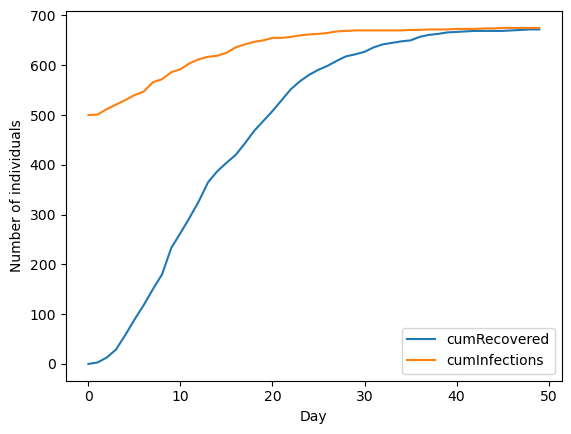

In [8]:
plt.plot(cumRecovered, label = "cumRecovered")
plt.plot(cumInfections, label = "cumInfections")

plt.legend()
plt.xlabel("Day")
plt.ylabel("Number of individuals")